In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Exploration :

The initial step involved a thorough exploration of the data to discern potential patterns, followed by the necessary adjustments to handle outliers. 

In [1]:
import pandas as pd
df=pd.read_csv("/kaggle/input/hotel-reservation/Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [6]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [7]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [8]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

# Handling Outliers:

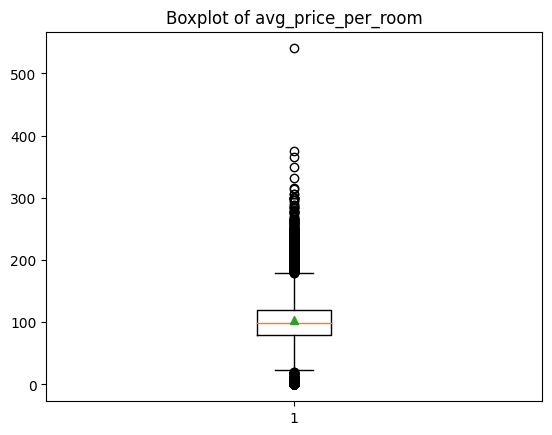

(34579, 24) 2


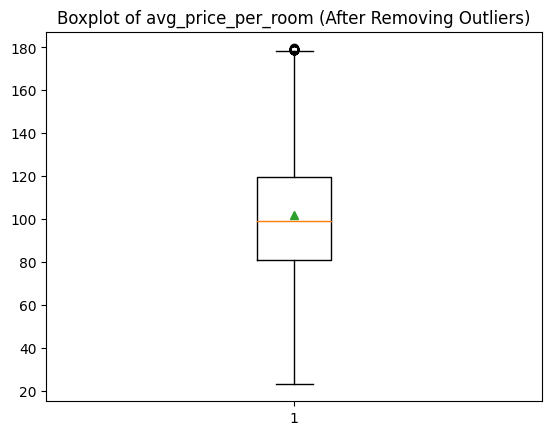

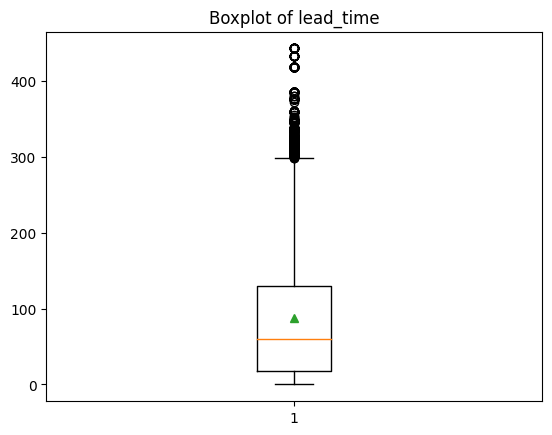

(33462, 24) 3


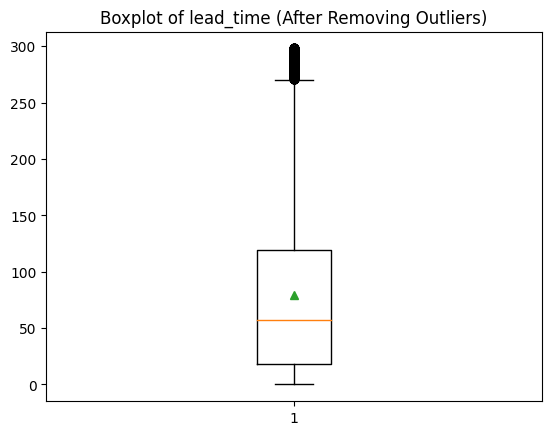

In [37]:
plt.boxplot(df.avg_price_per_room, showmeans=True)
plt.title('Boxplot of avg_price_per_room')
plt.show()
# removing the outliers
# Calculate IQR for the column
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1
# Identify and remove outliers
df = df[~((df['avg_price_per_room'] < (Q1 - 1.5 * IQR)) | (df['avg_price_per_room'] > (Q3 + 1.5 * IQR)))]
print(df.shape, "2") # (34579, 19)
plt.boxplot(df.avg_price_per_room, showmeans=True)
plt.title('Boxplot of avg_price_per_room (After Removing Outliers)')
plt.show()
plt.boxplot(df.lead_time, showmeans=True)
plt.title('Boxplot of lead_time')
plt.show()
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
# Identify and remove outliers
df = df[~((df['lead_time'] < (Q1 - 1.5 * IQR)) | (df['lead_time'] > (Q3 + 1.5 * IQR)))]
print(df.shape, "3") # (33462, 19)
plt.boxplot(df.lead_time, showmeans=True)
plt.title('Boxplot of lead_time (After Removing Outliers)')
plt.show()

In [38]:
df = df[df['no_of_adults'] >= 0]
df = df[df['no_of_children'] >= 0]
df = df[df['avg_price_per_room'] > 0]
print(df.shape, "4") # (33462, 19)

df = df.drop_duplicates()

(33462, 24) 4


In [39]:
bins = [0, 7, 30, 90, float('inf')]
labels = ['Week', 'Month', '3 Months', 'More than 3 months']

# Create a new column for lead_time bins
df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)


# Data Cleaning and Visualization Explanation:

Data Consistency: Invalid data (negative values or zero prices) were filtered out, and duplicates were removed, leaving 33,462 unique records.

Feature Engineering: Dropped the 'Booking_ID' column and grouped the 'lead_time' into categorical bins to capture ranges of lead times (Week, Month, etc.).

Visualization: Plotted a stacked bar chart showing the booking status (canceled or not) against these 'lead_time' groups, providing insights into cancellation trends. Afterwards, the distribution of values in the 'market_segment_type' column is printed.

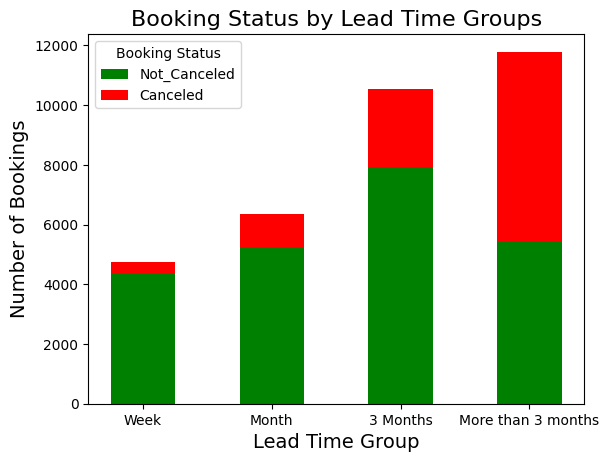

market_segment_type
Online           21725
Offline           9589
Corporate         2007
Aviation           125
Complementary       16
Name: count, dtype: int64


In [40]:
bar_data = {}
for group in labels:
    subset = df[df['lead_time_group'] == group]
    bar_data[group] = {
        'Not_Canceled': len(subset[subset['status'] == 0]),
        'Canceled': len(subset[subset['status'] == 1])
    }

# Data to plot
labels = list(bar_data.keys())
not_canceled_counts = [bar_data[label]['Not_Canceled'] for label in labels]
canceled_counts = [bar_data[label]['Canceled'] for label in labels]

# Create the stacked bar plot
fig, ax = plt.subplots()
width = 0.5

p1 = plt.bar(labels, not_canceled_counts, width, color='green', label='Not_Canceled')
p2 = plt.bar(labels, canceled_counts, width, color='red', bottom=not_canceled_counts, label='Canceled')

# Add title and labels
plt.title('Booking Status by Lead Time Groups', fontdict={'fontsize': 16})
plt.xlabel('Lead Time Group', fontdict={'fontsize': 14})
plt.ylabel('Number of Bookings', fontdict={'fontsize': 14})

# Add a legend
plt.legend(title='Booking Status')

# Show the plot
plt.show()


print(df['market_segment_type'].value_counts())

# Cancellation Analysis by Market Segment Explanation:

Data Preparation: For each market segment, the code calculates the percentage of bookings that were canceled.

Visualization: Using the calculated percentages, a bar chart is plotted for each market segment to visualize the cancellation rates.

Annotations: Each bar in the chart is annotated with the exact cancellation percentage value, providing a clear and informative representation of the data.

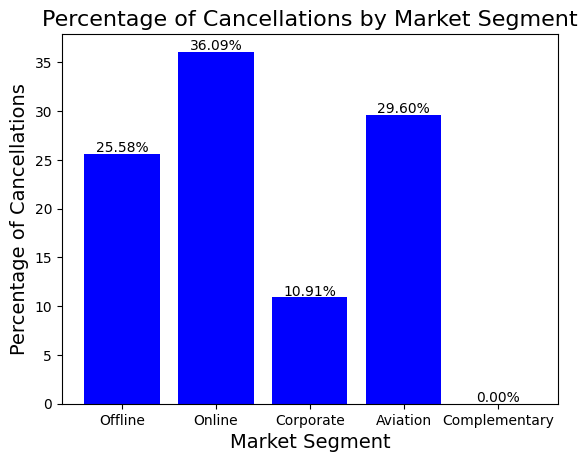

In [41]:
# Percentage of Cancellations by Market Segment
# Initialize data for the bar chart
bar_data = {}
market_segments = df['market_segment_type'].unique()

for segment in market_segments:
    subset = df[df['market_segment_type'] == segment]
    total_bookings = len(subset)
    canceled_bookings = len(subset[subset['booking_status'] == 'Canceled'])

    if total_bookings > 0:  # Avoid division by zero
        cancel_percentage = (canceled_bookings / total_bookings) * 100
    else:
        cancel_percentage = 0

    bar_data[segment] = cancel_percentage

# Data to plot
labels = list(bar_data.keys())
cancel_percentages = [bar_data[label] for label in labels]

# Create the bar plot
fig, ax = plt.subplots()
plt.bar(labels, cancel_percentages, color='blue')  # You can change the color as needed

# Add title and labels
plt.title('Percentage of Cancellations by Market Segment', fontdict={'fontsize': 16})
plt.xlabel('Market Segment', fontdict={'fontsize': 14})
plt.ylabel('Percentage of Cancellations', fontdict={'fontsize': 14})

# Annotate each bar with the corresponding percentage value
for i, v in enumerate(cancel_percentages):
    ax.text(i, v+0.2, "{:.2f}%".format(v), color='black', ha='center')
# Show the plot
plt.show()

# Machine Learning Workflow for Booking Cancellation Prediction

Encoding Categorical Features: The categorical columns ('type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status') in the dataset are encoded using LabelEncoder to convert them into numeric values suitable for machine learning models.

Data Splitting: The dataset is split into predictors (features) and target (booking status). This data is then divided into a training set (70% of data) and a test set (30% of data).

Model Building and Evaluation: Initially, a Random Forest classifier is built and trained, followed by its evaluation on both training and test sets. Given signs of overfitting in this model, a second Random Forest classifier with additional hyperparameters (like max_depth, min_samples_split, etc.) is constructed to prevent overfitting. This revised model is trained, evaluated, and its feature importance is also displayed.

In [44]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import utils

In [57]:
from sklearn.model_selection import train_test_split
# Encoding Categorical Features
# Create a copy of the DataFrame to not modify the original data
df_encoded = df.copy()
df_encoded = df_encoded.drop('lead_time_group', axis=1)

# List of columns to encode
columns_to_encode = ['Booking_ID','type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    encoder = LabelEncoder()
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

# Display the first few rows of the encoded DataFrame to see the changes
print(df.head())
print(df_encoded.head())


# Data Splitting
# Define your predictors (features) and the target (label)
# For the purpose of this example, let's assume you want to predict 'booking_status' from other features.
# If this isn't the case, please specify your target column.
X = df_encoded.drop('booking_status', axis=1)
y = df_encoded['booking_status']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)


# Model Building # 1
# Create a Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,              # Limit the depth of the tree
    min_samples_split=10,      # Minimum samples required to make a split
    min_samples_leaf=5,        # Minimum samples required to be a leaf node
    max_features='sqrt',       # Square root of total features will be used
    bootstrap=True             # Use bootstrap samples
)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Print out the importance of each feature
feature_importances = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
# the most important feature is: lead_time: 0.3123




  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  ...  \
0        Room_Type 1        224          2017  ...   
1        Room_Type 1          5          2018  ...   
2       

In [58]:
import pickle

# Save the trained model to a file
model_filename = 'geekschallenge_shreya_jain.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved to {model_filename}")


Model saved to geekschallenge_shreya_jain.pkl


In [59]:
with open(model_filename, 'rb') as file:
   clf = pickle.load(file)

# Now, you can use loaded_model for making predictions
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [60]:
# Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Precision
train_precision = precision_score(y_train, train_preds)
test_precision = precision_score(y_test, test_preds)

# Recall
train_recall = recall_score(y_train, train_preds)
test_recall = recall_score(y_test, test_preds)

print()
print("Training Data Metrics:")
print(f"Accuracy: {train_accuracy:.4f}") # 0.9947
print(f"Precision: {train_precision:.4f}") # 0.9946
print(f"Recall: {train_recall:.4f}") # 0.9978

print("\nTest Data Metrics:")
print(f"Accuracy: {test_accuracy:.4f}") # 0.8960
print(f"Precision: {test_precision:.4f}") # 0.9061
print(f"Recall: {test_recall:.4f}") # 0.9449
print()

# overfitting !




Training Data Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Test Data Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

